<a href="https://colab.research.google.com/github/bartianbosch/Melk/blob/Oscar/Big_Data_Milk_Oscar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Data Groupwork Milk


In [1]:
# To download and update the necessary requirements initialize Apache Spark, run this cell
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
sp = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# Added imports
from pyspark import SparkFiles

import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
plt.rcParams['figure.figsize'] = [30, 20]

from pyspark.sql import types
from pyspark.sql import functions as F

# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive/')

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubu

Loading the data into a DF


In [3]:
# Work from dataframes is sufficient
url = 'https://raw.githubusercontent.com/bartianbosch/Melk/main/ff_dairy_v1_preprocessed.csv'
fileName = url.split('/')[-1]

spark.sparkContext.addFile(url)

milk_rdd = spark.read.csv(SparkFiles.get(fileName), header=True)


# Also loading to pandas table just in case we need it for testing
milk_pd=pd.read_csv(url, encoding='latin1')


In [6]:
# To check pandas dataframe, run this cell

#milk_pd

In [51]:
milk_rdd.show(5)

+----------+-------+----+---------+---------+----------------+------------+----------+----+------------------------------------------+-----------------------------------------------+---------------------------+---------------------------+-----------------+-----------------------+-----------+----+-----------------+---------------+----+--------+------------+--------------+--------+-----------------------+---------+-----------------------+-------------------------+-------+-----------------------+---------------+-------------------------------------+--------------------------------------+-----------------+-------------------------+-------------------+-----------------------+-------+-------------------------+--------------------------+--------------+------------------+------------------+----------------------+------------------+--------+-------------------+-------------+---------------------+-----------------+--------------+----------+---------+----------+----------+---------+----------+---

# Question 1: 

Which combination of nutrients is the best predictor for the fat yield (milk yield * fat %) ?

In [8]:
# Select the yield column and fat% column

yield_col = milk_rdd.select('Milk yield (kg)')
fat_pc_col = milk_rdd.select('Fat%')

yield_col.take(5)
yield_col.show(5)

yield_fat = map(lambda x, y : x*y, (yield_col, fat_pc_col))
yield_fat.alias('Fat yield')



+---------------+
|Milk yield (kg)|
+---------------+
|          40.47|
|          38.29|
|          39.28|
|          38.16|
|          44.06|
+---------------+
only showing top 5 rows



AttributeError: ignored

In [ ]:
# select the nutrient columns in g/day

# crude fiber, sugar, crude protein, crude fat, starch, Ca, P, Na, Cl, K, Mg, WDS, SPK, TPK, SPE, TPE, +I, Wi, GP 
# intestines: nXP, RNB, MELK, NEL, WDE, EKB

cr_fiber_col = milk_rdd.select('Crude fiber (g/day)')
sugar_col = milk_rdd.select('Sugar (g/day)')
cr_protein_col = milk_rdd.select('Crude protein (g/day)')
cr_fat_col = milk_rdd.select('Crude fat (g/day)')
starch_col = milk_rdd.select('Starch (g/day)')

ca_col = milk_rdd.select('Ca (g/day)')
p_col = milk_rdd.select('P (g/day)')
na_col = milk_rdd.select('Na (g/day)')
cl_col = milk_rdd.select('Cl (g/day)')
k_col = milk_rdd.select('K (g/day)')
mg_col = milk_rdd.select('Mg (g/day)')



In [ ]:
# create linear regression models 

import seaborn as sns 

sns.scatterplot(x = milk_rdd.select(*), y = milk_rdd.select(*))

SyntaxError: ignored



---


## Oscars Playground


### Random commands for the fun of it

   Cow number     Date  Barn  ...  I (/kg dm) WI (/kg dm)  GP (g/kg dm)
0          61  16/6/14   6.0  ...          NaN         NaN           NaN
1          61  17/6/14   6.0  ...          107         112           140
2          61  18/6/14   6.0  ...          106         110           140
3          61  19/6/14   6.0  ...          106         108           140
4          61  20/6/14   6.0  ...          107         112           140

[5 rows x 96 columns]
Index(['Cow number', 'Date', 'Barn', 'Barn part', 'Treatment',
       'Lactation number', 'Days in milk', 'Day number', 'Week',
       'Period (VP = preperiod, HP = trial period)',
       'Period part (VP = preperiod, HP = trial period)',
       'Intake basal ration (kg dm)', 'Intake total ration (kg dm)',
       'Water intake (kg)', 'Concentrate intake (kg)', 'Weight (kg)', 'BCS',
       'Backfat Thickness', 'Milk yield (kg)', 'Fat%', 'Protein%',
       'Urea (mg/kg)', 'SCC (*1000/ml)', 'Lactose%', 'Avg. Temperature (¡C)',
       'A

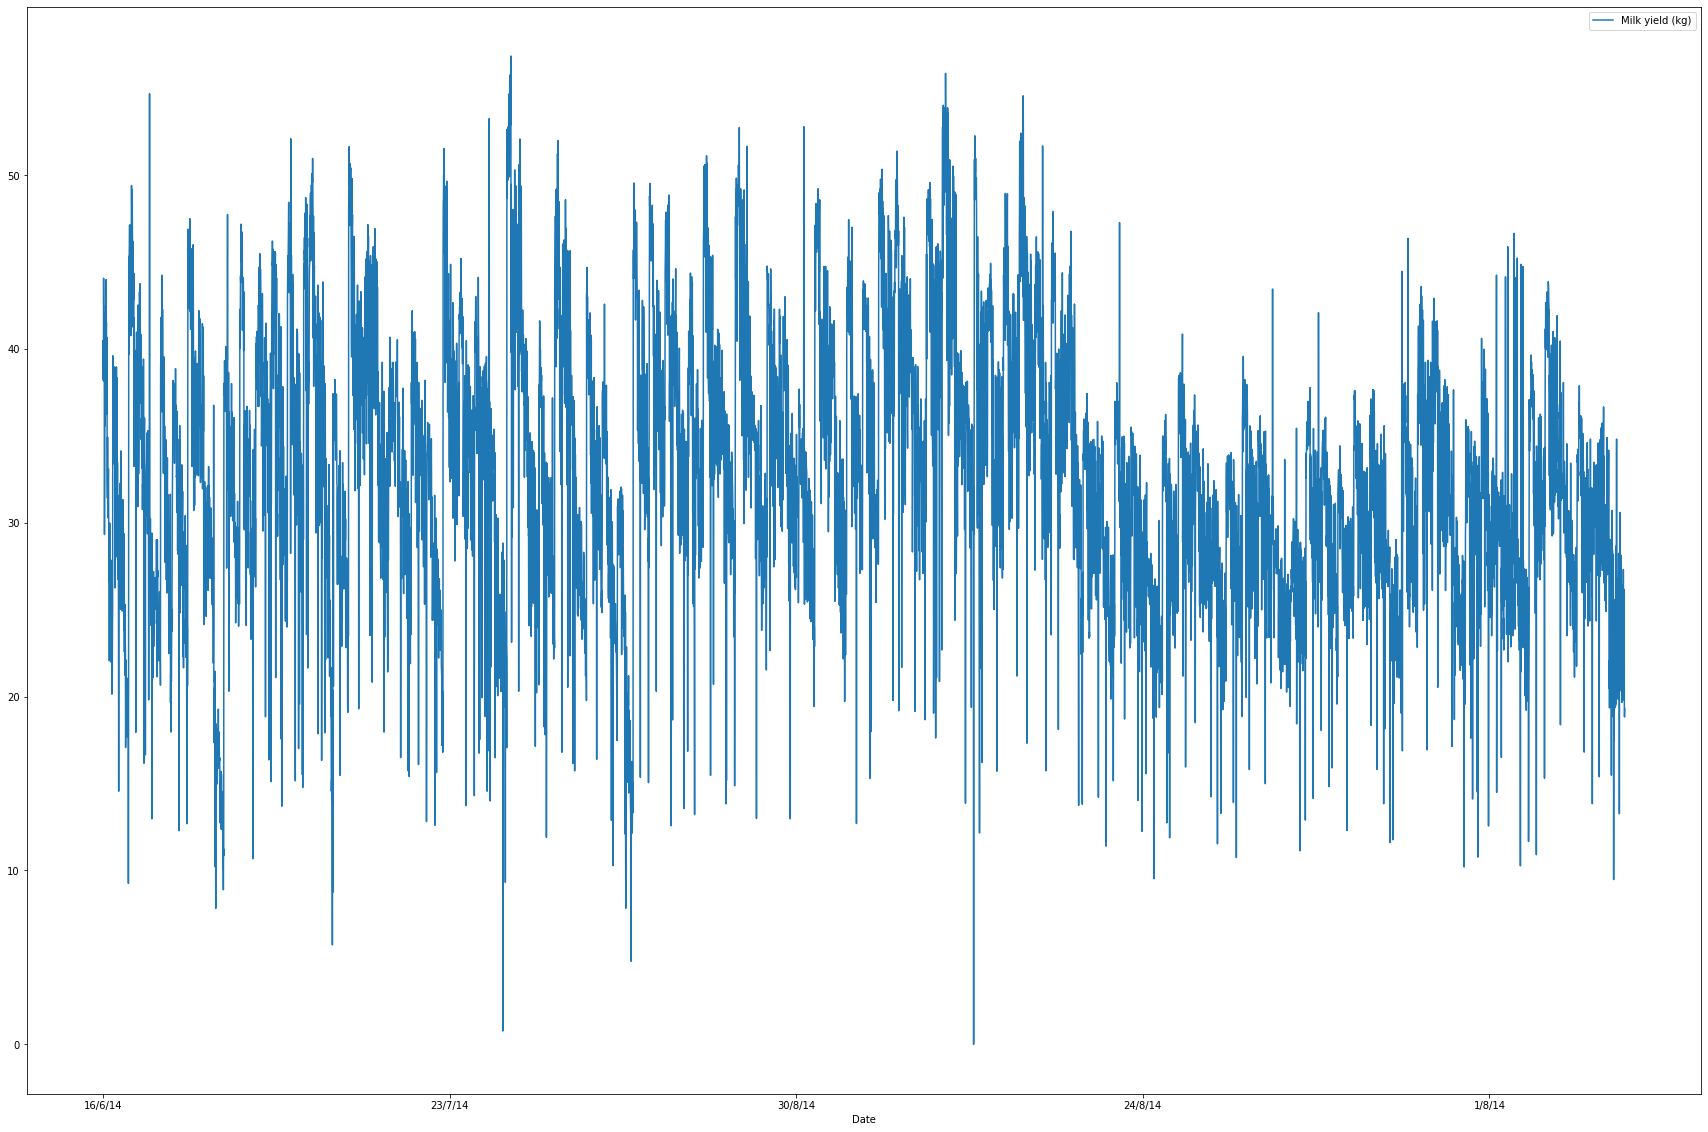

In [ ]:
# Pandas Visualization
print(milk_pd.head())
print(milk_pd.columns)

milk_pd.plot( x='Date',y='Milk yield (kg)')

print(milk_pd['I (/kg dm)'])

In [ ]:
!ls '../bin'


bash	       hostname       su
bunzip2        journalctl     sync
bzcat	       kill	      systemctl
bzcmp	       kmod	      systemd
bzdiff	       less	      systemd-ask-password
bzegrep        lessecho       systemd-escape
bzexe	       lessfile       systemd-hwdb
bzfgrep        lesskey	      systemd-inhibit
bzgrep	       lesspipe       systemd-machine-id-setup
bzip2	       ln	      systemd-notify
bzip2recover   login	      systemd-sysusers
bzless	       loginctl       systemd-tmpfiles
bzmore	       ls	      systemd-tty-ask-password-agent
cat	       lsblk	      tar
chgrp	       lsmod	      tempfile
chmod	       mkdir	      touch
chown	       mknod	      true
cp	       mktemp	      udevadm
dash	       more	      ulockmgr_server
date	       mount	      umount
dd	       mountpoint     uname
df	       mv	      uncompress
dir	       networkctl     vdir
dmesg	       nisdomainname  wdctl
dnsdomainname  pidof	      which
domainname     ps	      ypdomainname
echo	       pwd	      zcat
egrep	     

In [ ]:
from pyspark.ml.regression import LinearRegression

(training, valData, testData) = milk_rdd.randomSplit([0.6, 0.2, 0.2])


lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

IllegalArgumentException: ignored

In [ ]:
milk_rdd.printSchema()
milk_rdd.describe().show()

root
 |-- Cow number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Barn: string (nullable = true)
 |-- Barn part: string (nullable = true)
 |-- Treatment: string (nullable = true)
 |-- Lactation number: string (nullable = true)
 |-- Days in milk: string (nullable = true)
 |-- Day number: string (nullable = true)
 |-- Week: string (nullable = true)
 |-- Period (VP = preperiod, HP = trial period): string (nullable = true)
 |-- Period part (VP = preperiod, HP = trial period): string (nullable = true)
 |-- Intake basal ration (kg dm): string (nullable = true)
 |-- Intake total ration (kg dm): string (nullable = true)
 |-- Water intake (kg): string (nullable = true)
 |-- Concentrate intake (kg): string (nullable = true)
 |-- Weight (kg): string (nullable = true)
 |-- BCS: string (nullable = true)
 |-- Backfat Thickness: string (nullable = true)
 |-- Milk yield (kg): string (nullable = true)
 |-- Fat%: string (nullable = true)
 |-- Protein%: string (nullable = true)
 |--

### Visualization of Data

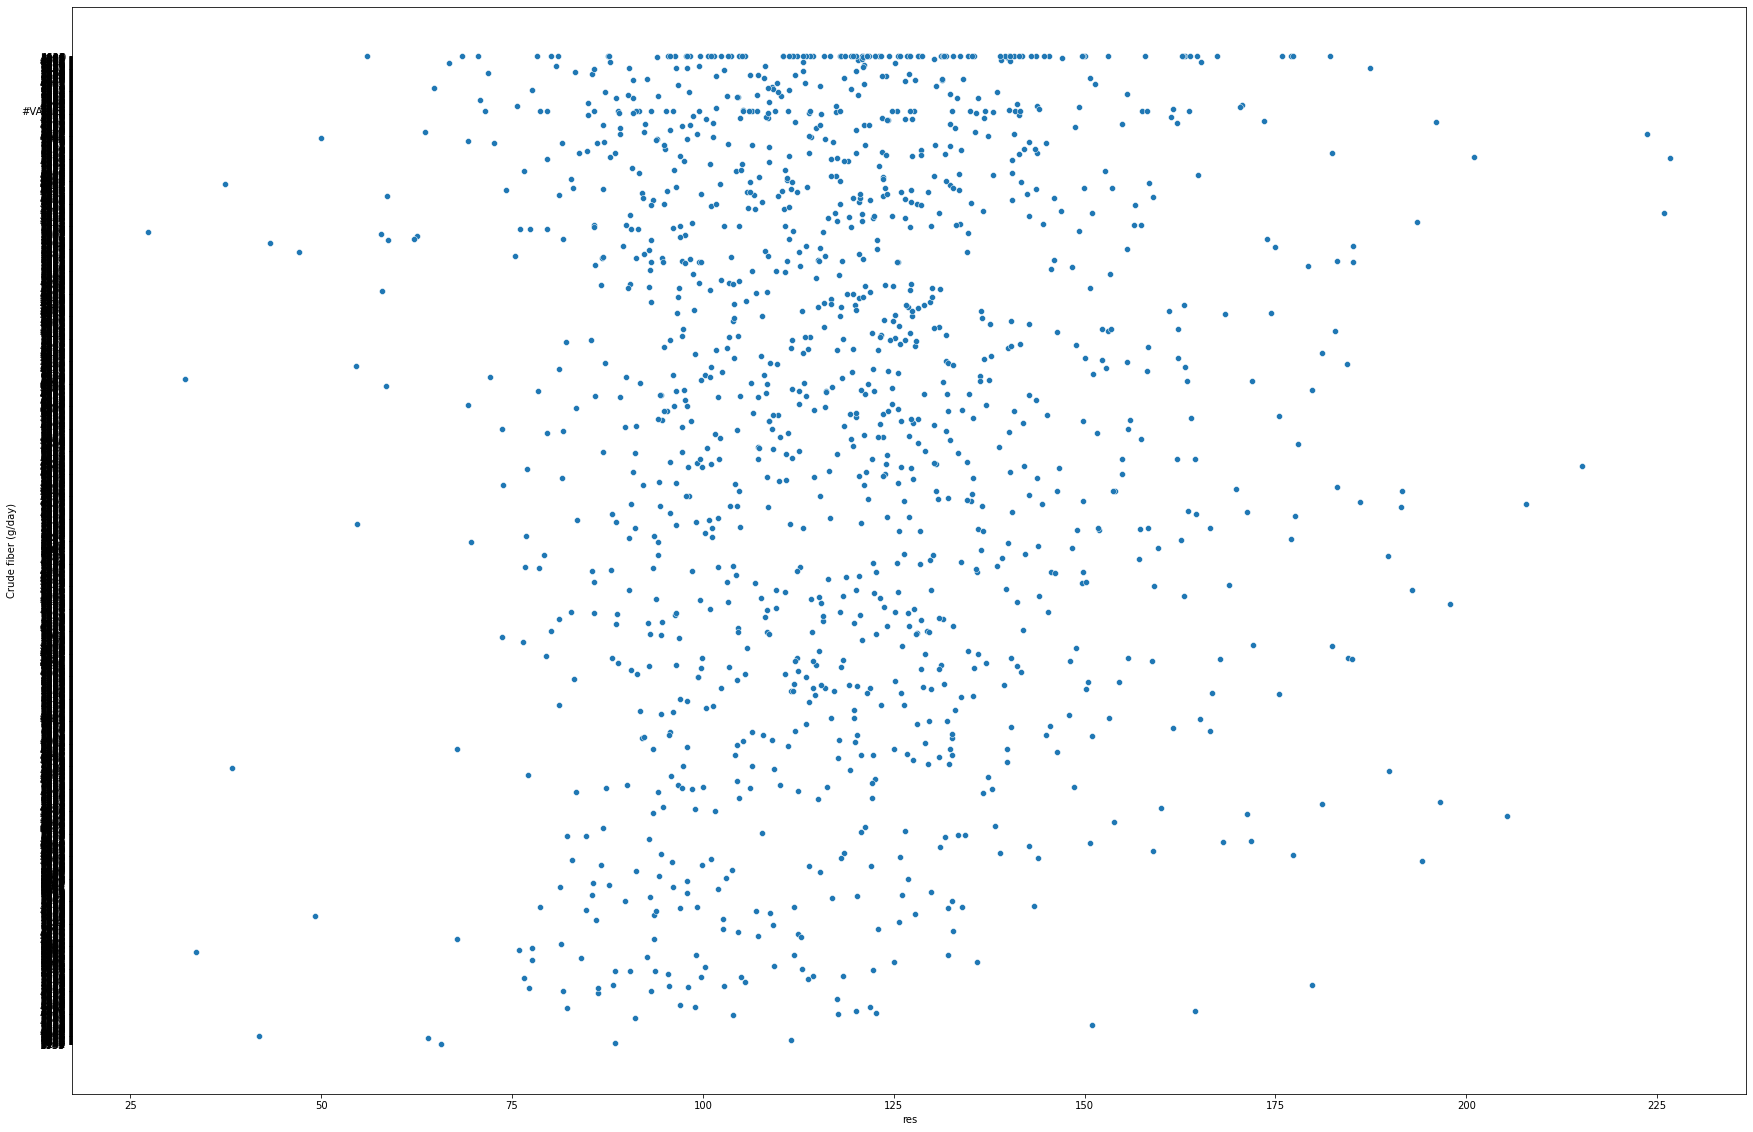

In [ ]:
# Plotting to check linear regression
import seaborn as sns
milk_rdd2 = milk_rdd.withColumn('res', milk_rdd['Milk yield (kg)']*milk_rdd['Fat%'])

sns.scatterplot(x='res', y='Crude fiber (g/day)', data=milk_rdd2.toPandas())

### Data Preparation

In [5]:
from pyspark.sql import functions as F
milk_rdd.show(5)
milk_rdd = milk_rdd.dropna(how="any",subset=["Intake basal ration (kg dm)","Intake total ration (kg dm)","Water intake (kg)","Concentrate intake (kg)","Weight (kg)"])
milk_rdd = milk_rdd.withColumn("Avg Temperature (degC)", F.col("Avg Temperature (degC)").cast('double'))
#milk_rdd2 = milk_rdd2.withColumn("Intake basal ration (kg dm)", milk_rdd2["Intake basal ration (kg dm)"].cast('double')).drop("Intake basal ration (kg dm)")


milk_rdd.printSchema()

+----------+-------+----+---------+---------+----------------+------------+----------+----+------------------------------------------+-----------------------------------------------+---------------------------+---------------------------+-----------------+-----------------------+-----------+----+-----------------+---------------+----+--------+------------+--------------+--------+----------------------+---------+----------------------+-------------------------+------+----------------------+---------------+-------------------------------------+--------------------------------------+-----------------+-------------------------+-------------------+-----------------------+-------+-------------------------+--------------------------+--------------+------------------+------------------+----------------------+------------------+--------+-------------------+-------------+---------------------+-----------------+--------------+----------+---------+----------+----------+---------+----------+-------

In [8]:
def fixType(datasetName, colName, dataType):
  """Takes a dataset and returns the dataset with the given column set to the given dataype"""
  return datasetName.withColumn(colName, F.col(colName).cast(dataType))

# Preparing Lists with the colum names and which type they need to be
allColumns = ['Cow number', 'Date', 'Barn', 'Barn part', 'Treatment', 'Lactation number', 'Days in milk', 'Day number', 'Week', 'Period (VP = preperiod, HP = trial period)', 'Period part (VP = preperiod, HP = trial period)', 'Intake basal ration (kg dm)', 'Intake total ration (kg dm)', 'Water intake (kg)', 'Concentrate intake (kg)', 'Weight (kg)', 'BCS', 'Backfat Thickness', 'Milk yield (kg)', 'Fat%', 'Protein%', 'Urea (mg/kg)', 'SCC (*1000/ml)', 'Lactose%', 'Avg Temperature (degC)', 'Air speed', 'Max temperature (degC)', 'Rumination time (min/day)', 'Avg pH', 'Avg Rumen Temperature ', 'Time pH<5,8 (h)', 'Manure consistency (1=fluid, 5= hard)', 'Manure fibre score (1=short, 5 = long)', 'Number of kernels', 'Manure sieving residu (%)', 'Manure dm (g/kg OM)', 'Manure starch (g/kg dm)', 'Urin-pH', 'Intake pre-period (kg dm)', 'Milk yield prepreriod (kg)', 'Fat% preperiod', 'Protein% preperiod', 'Fat preperiod (kg)', 'Protein preperiod (kg)', 'ECM preperiod (kg)', 'ECM (kg)', 'Crude fiber (g/day)', 'Sugar (g/day)', 'Crude protein (g/day)', 'Crude fat (g/day)', 'Starch (g/day)', 'Ca (g/day)', 'P (g/day)', 'Na (g/day)', 'Cl (g/day)', 'K (g/day)', 'Mg (g/day)', 'nXP (g/day)', 'RNB (g/day)', 'MELK (g/day)', 'NEL (g/day)', 'WDE (g/day)', 'EKB (g/day)', 'WDS (g/day)', 'SPK (g/day)', 'TPK (g/day)', 'SPE (g/day)', 'TPE (g/day)', 'plusI (/day)', 'WI (/day)', 'GP (g/day)', 'Crude fiber (g/kg dm)', 'Sugar (g/kg dm)', 'Crude protein (g/kg dm)', 'Crude fat (g/kg dm)', 'Starch (g/kg dm)', 'Ca (g/kg dm)', 'P (g/kg dm)', 'Na (g/kg dm)', 'Cl (g/kg dm)', 'K (g/kg dm)', 'Mg (g/kg dm)', 'nXP (g/kg dm)', 'RNB (g/kg dm)', 'MELK (/kg dm)', 'NEL (MJ/kg dm)', 'WDE (g/kg dm)', 'EKB (g/kg dm)', 'WDS (g/kg dm)', 'SPK (g/kg dm)', 'TPK (g/kg dm)', 'SPE (g/kg dm)', 'TPE (g/kg dm)', 'plusI (/kg dm)', 'WI (/kg dm)', 'GP (g/kg dm)']
doubleColumns = ['Intake basal ration (kg dm)', 'Intake total ration (kg dm)', 'Water intake (kg)', 'Concentrate intake (kg)', 'Weight (kg)', 'BCS', 'Milk yield (kg)', 'Fat%', 'Protein%', 'Lactose%', 'Avg Temperature (degC)', 'Air speed', 'Max temperature (degC)', 'Avg pH', 'Avg Rumen Temperature ', 'Time pH<5,8 (h)', 'Number of kernels', 'Manure sieving residu (%)', 'Manure starch (g/kg dm)', 'Urin-pH', 'Intake pre-period (kg dm)', 'Milk yield prepreriod (kg)', 'Fat% preperiod', 'Protein% preperiod', 'Fat preperiod (kg)', 'Protein preperiod (kg)', 'ECM preperiod (kg)', 'ECM (kg)']
intColumns = ['Cow number', 'Barn', 'Barn part', 'Lactation number', 'Days in milk', 'Day number', 'Week', 'Backfat Thickness', 'Urea (mg/kg)', 'SCC (*1000/ml)', 'Rumination time (min/day)', 'Manure consistency (1=fluid, 5= hard)', 'Manure fibre score (1=short, 5 = long)', 'Manure dm (g/kg OM)', 'Crude fiber (g/day)', 'Sugar (g/day)', 'Crude protein (g/day)', 'Crude fat (g/day)', 'Starch (g/day)', 'Ca (g/day)', 'P (g/day)', 'Na (g/day)', 'Cl (g/day)', 'K (g/day)', 'Mg (g/day)', 'nXP (g/day)', 'RNB (g/day)', 'MELK (g/day)', 'NEL (g/day)', 'WDE (g/day)', 'EKB (g/day)', 'WDS (g/day)', 'SPK (g/day)', 'TPK (g/day)', 'SPE (g/day)', 'TPE (g/day)', 'plusI (/day)', 'WI (/day)', 'GP (g/day)', 'Crude fiber (g/kg dm)', 'Sugar (g/kg dm)', 'Crude protein (g/kg dm)', 'Crude fat (g/kg dm)', 'Starch (g/kg dm)', 'Ca (g/kg dm)', 'P (g/kg dm)', 'Na (g/kg dm)', 'Cl (g/kg dm)', 'K (g/kg dm)', 'Mg (g/kg dm)', 'nXP (g/kg dm)', 'RNB (g/kg dm)', 'MELK (/kg dm)', 'NEL (MJ/kg dm)', 'WDE (g/kg dm)', 'EKB (g/kg dm)', 'WDS (g/kg dm)', 'SPK (g/kg dm)', 'TPK (g/kg dm)', 'SPE (g/kg dm)', 'TPE (g/kg dm)', 'plusI (/kg dm)', 'WI (/kg dm)', 'GP (g/kg dm)']
stringColumn = ['Treatment', 'Period (VP = preperiod, HP = trial period)', 'Period part (VP = preperiod, HP = trial period)']
milk_rdd2 = milk_rdd

# Setting the columns to the correct type
for colName in doubleColumns:
  milk_rdd2 = fixType(milk_rdd2, colName, "double")
for colName in intColumns:
  milk_rdd2 = fixType(milk_rdd2, colName, "int")
milk_rdd2 = milk_rdd2.withColumn("Date", F.col("Date").cast("date"))

milk_rdd2.printSchema()


root
 |-- Cow number: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Barn: integer (nullable = true)
 |-- Barn part: integer (nullable = true)
 |-- Treatment: string (nullable = true)
 |-- Lactation number: integer (nullable = true)
 |-- Days in milk: integer (nullable = true)
 |-- Day number: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Period (VP = preperiod, HP = trial period): string (nullable = true)
 |-- Period part (VP = preperiod, HP = trial period): string (nullable = true)
 |-- Intake basal ration (kg dm): double (nullable = true)
 |-- Intake total ration (kg dm): double (nullable = true)
 |-- Water intake (kg): double (nullable = true)
 |-- Concentrate intake (kg): double (nullable = true)
 |-- Weight (kg): double (nullable = true)
 |-- BCS: double (nullable = true)
 |-- Backfat Thickness: integer (nullable = true)
 |-- Milk yield (kg): double (nullable = true)
 |-- Fat%: double (nullable = true)
 |-- Protein%: double (nullable = true

In [12]:
# Create the vectorizer that adds the features column needed to run a machine learning pipeline
from pyspark.ml.feature import VectorAssembler
vectorizer = VectorAssembler(
    inputCols=["Intake basal ration (kg dm)","Intake total ration (kg dm)","Water intake (kg)","Concentrate intake (kg)","Weight (kg)"], #add columns you want to check out here
    outputCol="features")

# Splitting the dataset into a training and testing portion.
#Setting a seed for reproducible results.
ourSeed = 1234  # default = 1234
(testSetDF, trainingSetDF) = milk_rdd.randomSplit([2.0,8.0],seed=ourSeed)


# Uncomment to cache these datasets for performance (untested)
#testSetDF.cache()
#trainingSetDF.cache()

### Linear Regression Machine Learning Model

In [21]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml import Pipeline

# Initialize the linear regression learner with default values for the parameters
lr = LinearRegression()

# Give the name of the column with the values that need to be learned
# and set the name of the collumn where the predicted results will be saved.
lr.setLabelCol("Milk yield (kg)")\
  .setPredictionCol("Predicted Milk yield (kg)")

# Create a pipeline that performs the vectorizer and the Linear Regression
# learning model.
lrPipeline = Pipeline()
lrPipeline.setStages([vectorizer, lr])

# Train the model on the training set with the default settings.
lrModel = lrPipeline.fit(trainingSetDF)


IllegalArgumentException: ignored